In [73]:
import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt
import tabloo
import numpy as np

plt.style.use('ggplot')

In [2]:
%matplotlib widget

In [ ]:
def bondPriceToYield(bondRow):
    timeLeft = bondRow['maturity'] - bondRow['date']
    interestRate = bondRow['coupon']
    yearsLeft = timeLeft.days/365.
    interest = yearsLeft * interestRate
    totalYield = (100 - bondRow['end-of-day-price'] + interest)/yearsLeft
    return totalYield

In [148]:
treasuriesPicklePath = '/Users/jetti/data/bonds/treasuries.pkl'

with open(treasuriesPicklePath, 'rb') as f:
  data = pickle.load(f)

df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]

print(len(df))

1168117


2023-10-09 07:31:49,048 - INFO     - Executing shutdown due to inactivity...
2023-10-09 07:32:13,170 - INFO     - Executing shutdown...
2023-10-09 07:32:13,173 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [128]:
# create dictionary mapping cusip to term length for COMPLETED cusips
termDict = {}

earliestDate = df['date'].min()
latestDate = df['date'].max()

for thisCusip in set(df['cusip']):
    dfCusip = df[df['cusip'] == thisCusip]
    minDate = dfCusip['date'].min()
    maxDate = dfCusip['date'].max()
    if minDate > earliestDate and maxDate < latestDate:
        maturity = dfCusip['maturity'].iloc[0]
        termLength = ((maturity - minDate).days)/7
        termDict[thisCusip] = (termLength, maturity)
    else:
        termDict[thisCusip] = (0,0)

In [166]:
# find cusips with given termlength bounds

lower = 50
upper = 53

cusips = [(cusip, termLength, maturity) for cusip, (termLength, maturity) in termDict.items() if termLength >= lower and termLength <= upper]
cusips

[('912796DU0', 52.0, Timestamp('2015-04-02 00:00:00')),
 ('9127963S6', 52.0, Timestamp('2021-07-15 00:00:00')),
 ('912796NV7', 52.0, Timestamp('2018-09-13 00:00:00')),
 ('912796FB0', 52.0, Timestamp('2015-10-15 00:00:00')),
 ('9127964L0', 52.0, Timestamp('2021-09-09 00:00:00')),
 ('912796V48', 52.0, Timestamp('2023-04-20 00:00:00')),
 ('912796FZ7', 52.0, Timestamp('2016-03-03 00:00:00')),
 ('912796BP3', 52.0, Timestamp('2014-06-26 00:00:00')),
 ('912796GD5', 52.0, Timestamp('2016-03-31 00:00:00')),
 ('912796RM3', 52.0, Timestamp('2019-11-07 00:00:00')),
 ('912796R27', 52.0, Timestamp('2022-12-29 00:00:00')),
 ('912796T33', 52.0, Timestamp('2023-02-23 00:00:00')),
 ('912796C31', 52.0, Timestamp('2022-01-27 00:00:00')),
 ('912796K57', 52.0, Timestamp('2022-07-14 00:00:00')),
 ('912796NZ8', 52.0, Timestamp('2018-10-11 00:00:00')),
 ('912796PP8', 52.0, Timestamp('2019-01-31 00:00:00')),
 ('912796GW3', 52.0, Timestamp('2016-07-21 00:00:00')),
 ('9127963H0', 52.0, Timestamp('2021-06-17 00:00

In [ ]:
# find cusips with given maturity date

year = 2023
month = 9
day = 12

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

In [177]:
# find data for given CUSIP

cusip = '912796R27'

thisTreasury = df[df['cusip'] == cusip].sort_values('date')
thisTreasury
#dtale.show(thisTreasury)

,date,cusip,description,coupon,maturity,end-of-day-price
149985,2021-12-30,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.626917
126813,2021-12-31,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.620000
187300,2022-01-03,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.611083
190735,2022-01-04,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.632056
212627,2022-01-05,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.603333
...,...,...,...,...,...,...
80490,2022-12-21,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.925139
80053,2022-12-22,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.935500
79617,2022-12-23,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.979000
79180,2022-12-27,912796R27,MARKET BASED BILL,0.0,2022-12-29,99.990361


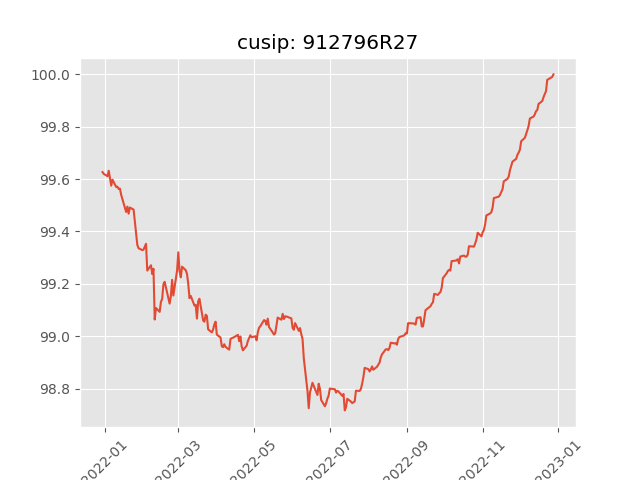

In [178]:
plt.figure()
plt.plot(thisTreasury['date'],thisTreasury['end-of-day-price'].to_numpy())
#plt.plot(thisTreasury['end-of-day-price'].to_numpy())
plt.xticks(rotation=45)
plt.title("cusip: " + cusip)
plt.show()

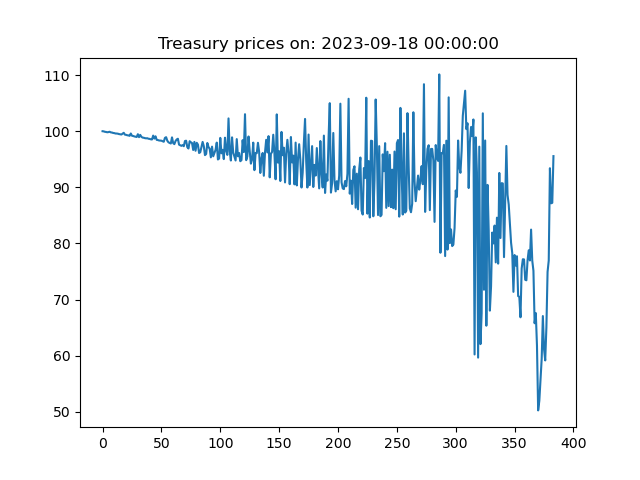

In [54]:
year = 2023
month = 9
day = 18

thisDate = datetime.datetime(year=year, month=month, day=day)
thisDayAll = df[(df['date'] == thisDate) & (df['description'] != 'TIPS') &  (df['description'] != 'MARKET BASED FRN')].sort_values('maturity')

plt.figure()
plt.plot(thisDayAll['end-of-day-price'].to_numpy())
plt.title("Treasury prices on: " + str(thisDate))
plt.show()

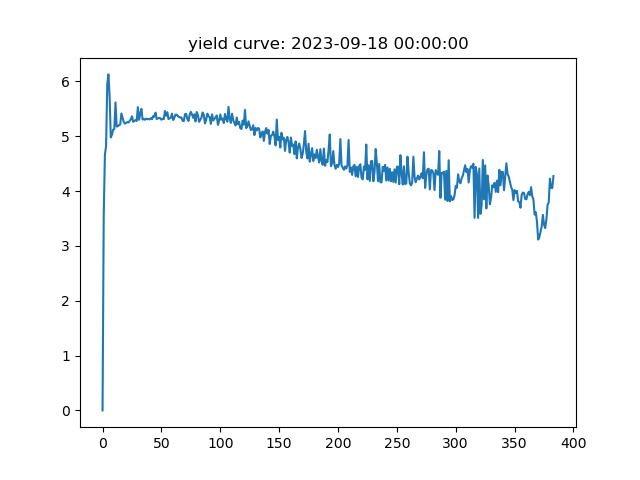

In [57]:
allYields = [bondPriceToYield(thisDayAll.iloc[i]) for i in range(0,len(thisDayAll))]
thisDayAll['yield'] = allYields
plt.figure()
plt.plot(allYields)
plt.title("yield curve: " + str(thisDate))
plt.show()